<h1>Path Patel 23AIML055</h1>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest, proportion_confint
import pandas as pd
import seaborn as sns

In [ ]:
np.random.seed(42)

In [ ]:
# Simulated visits and conversions for both A and B
visits_A = 10000
visits_B = 10000

# Let's assume old funnel (A) has 10% conversion rate, new funnel (B) has 12%
conversion_rate_A = 0.10
conversion_rate_B = 0.12

# Generate purchases as binomial outcomes
purchases_A = np.random.binomial(visits_A, conversion_rate_A)
purchases_B = np.random.binomial(visits_B, conversion_rate_B)

In [ ]:
# Conversion rates at 95%
# Conversion rates
cr_A = purchases_A / visits_A
cr_B = purchases_B / visits_B

# 95% confidence intervals using normal approximation (Wald interval)
ci_A = proportion_confint(purchases_A, visits_A, alpha=0.05, method='normal')
ci_B = proportion_confint(purchases_B, visits_B, alpha=0.05, method='normal')

print(f"Conversion Rate A: {cr_A:.3f}, 95% CI: ({ci_A[0]:.3f}, {ci_A[1]:.3f})")
print(f"Conversion Rate B: {cr_B:.3f}, 95% CI: ({ci_B[0]:.3f}, {ci_B[1]:.3f})")

Conversion Rate A: 0.097, 95% CI: (0.091, 0.102)
Conversion Rate B: 0.122, 95% CI: (0.116, 0.128)


**Conclusion:** If the confidence interval do not overlap then it may represent a significant difference between A and B.


If the 95% confidence intervals do not overlap it means:
*   The conversion rate of A is different from B
*   This represents a significant difference between the two

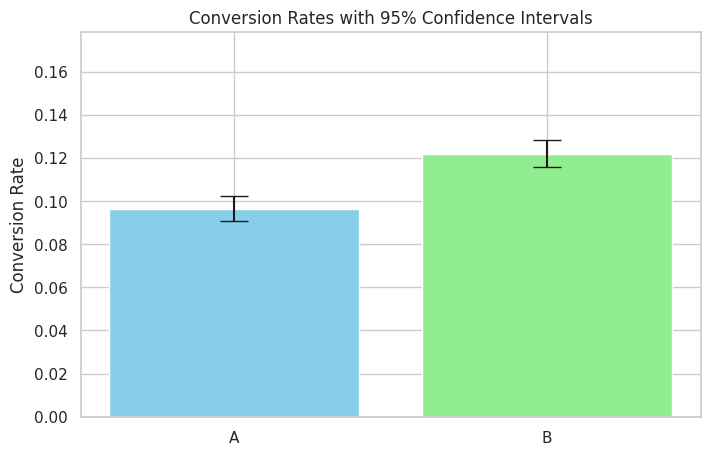

In [ ]:
labels = ['A', 'B']
conversion_rates = [cr_A, cr_B]
ci_lower = [cr_A - ci_A[0], cr_B - ci_B[0]]
ci_upper = [ci_A[1] - cr_A, ci_B[1] - cr_B]

plt.figure(figsize=(8, 5))
plt.bar(labels, conversion_rates, yerr=[ci_lower, ci_upper], capsize=10, color=['skyblue', 'lightgreen'])
plt.title('Conversion Rates with 95% Confidence Intervals')
plt.ylabel('Conversion Rate')
plt.ylim(0, max(ci_A[1], ci_B[1]) + 0.05)
plt.show()

**Conclusion:**
* Bar A represents the old website
* Bar B represents the new website

###From Graph
* Here the bar of B is higher than that of A which means that more visitors are converted to buyers in B.

* The error bar does not overlap that means there is a significant difference between both the websites.

* The gap between the top of bar A and top of bar B represents the magnitude of improvement.If there is improvement in conversion rate than there is a major impact on the revenue of the company.

In [ ]:
# Two-Proportion Z-Test

# Combine data
successes = np.array([purchases_A, purchases_B])
samples = np.array([visits_A, visits_B])

# H0: p_A = p_B
# H1: p_A != p_B

z_stat, p_value = proportions_ztest(successes, samples)

print(f"Z-statistic: {z_stat:.3f}")
print(f"P-value: {p_value:.5f}")

if p_value < 0.05:
  print("We reject the null hypothesis and conclude that B performs significantly different from A.")
else:
  print("We fail to reject the null hypothesis and conclude that B performs similarly to A.")

Z-statistic: -5.780
P-value: 0.00000
We reject the null hypothesis and conclude that B performs significantly different from A.


**Conclusion:**
We use Z-Test to see if the difference between the conversion rates of websites A and B are statistically significant or occur by a random chance

Based on the two-proportion z-test, we tested whether the conversion rate of Funnel B is statistically different from Funnel A.
* If the p-value is below 0.05, we reject the null hypothesis and confirm that Funnel B is statistically different, likely better if its conversion rate is higher.

* f the p-value is above 0.05, we fail to reject the null, and conclude that there is no significant difference between the two funnels.

In [ ]:
# Real-Time Monitoring
# Simulating sequential updates
sequential_results = []
batch_size = 500

for i in range(1, visits_A // batch_size + 1):
    batch_A = np.random.binomial(batch_size, conversion_rate_A)
    batch_B = np.random.binomial(batch_size, conversion_rate_B)

    cumulative_A = i * batch_size
    cumulative_B = i * batch_size
    cumulative_conv_A = batch_A if i == 1 else sequential_results[-1]['conv_A'] + batch_A
    cumulative_conv_B = batch_B if i == 1 else sequential_results[-1]['conv_B'] + batch_B

    # Run z-test
    z_stat, p_val = proportions_ztest(
        [cumulative_conv_A, cumulative_conv_B],
        [cumulative_A, cumulative_B]
    )

    sequential_results.append({
        'iteration': i,
        'samples': cumulative_A,
        'conv_A': cumulative_conv_A,
        'conv_B': cumulative_conv_B,
        'p_value': p_val
    })

# Convert to dataframe
sequential_df = pd.DataFrame(sequential_results)


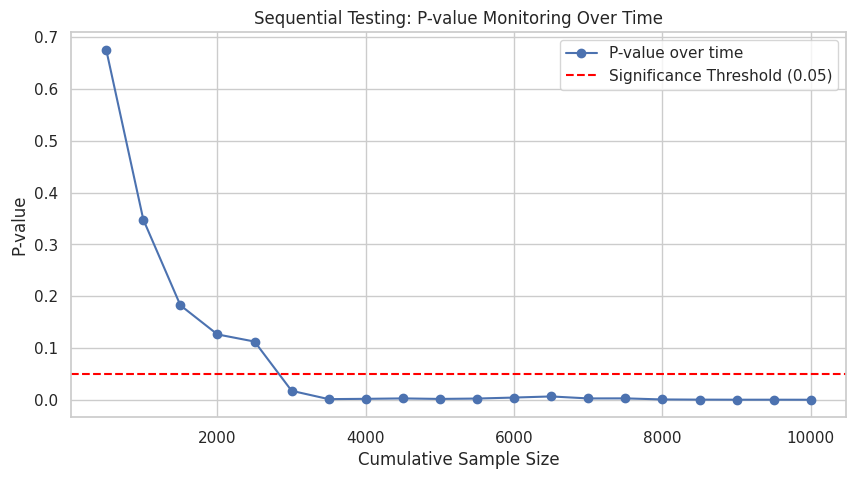

In [ ]:
# Plotting Real-Time P-Value Monitoring

plt.figure(figsize=(10, 5))
plt.plot(sequential_df['samples'], sequential_df['p_value'], label='P-value over time', marker='o')
plt.axhline(y=0.05, color='red', linestyle='--', label='Significance Threshold (0.05)')
plt.title('Sequential Testing: P-value Monitoring Over Time')
plt.xlabel('Cumulative Sample Size')
plt.ylabel('P-value')
plt.legend()
plt.grid(True)
plt.show()

**Cnclusion:**
* We can see that with the increase in the sample size the p-value varies a lot.
* We can aslo say that with the increase of the sample size the p-value gets stable and there is less fluctuation.
* If the p-value drops below Significance Threshold then the we can say that statistical significance is achived.
* We reject the null hypothesis only if the p-value drops below Significance Threshold and stays below it or it never goes below Significance Threshold or just dips and comes back up.
